# Lab 4 Data Visualisation on Python with Seaborn

## Import data

In [47]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
con = sqlite3.connect('northwind.db')
df=pd.read_sql('''with revenues as (SELECT
shipregion,
customerid,
orders.orderid,
orderdate,
productid,
(unitprice*quantity*(1-discount)) as revenue
from orders,"order details"
on orders.orderid="order details".orderid
group by orderdate,shipregion,customerid,orders.orderid, productid)
SELECT orderdate,shipregion, customerid,sum(revenue) as revenuedaily,
count(orderid) as ordersdaily
from revenues
group by orderdate;''',con=con)

df.orderdate=pd.to_datetime(df.orderdate)
df.shipregion=df.shipregion.astype('category')

## 2. Use matplotlib and seaborn to construct a dashboard from the data obtained, describing the orders:
2.1 Create line graphs describing the revenue history (revenuedaily) and the number of of orders (ordersdaily) (total for the week)

2.2 Create a pie chart showing shipregion's share in revenue for the whole period

2.3 Create a bar chart showing the revenue of class A clients. According to ABC analysis this is the list of clients that bring 80% of the total revenue for the period.

2.4 Create a grid of 4 nested graphs and feed each of them with diagrams from 2.1 - 2.3

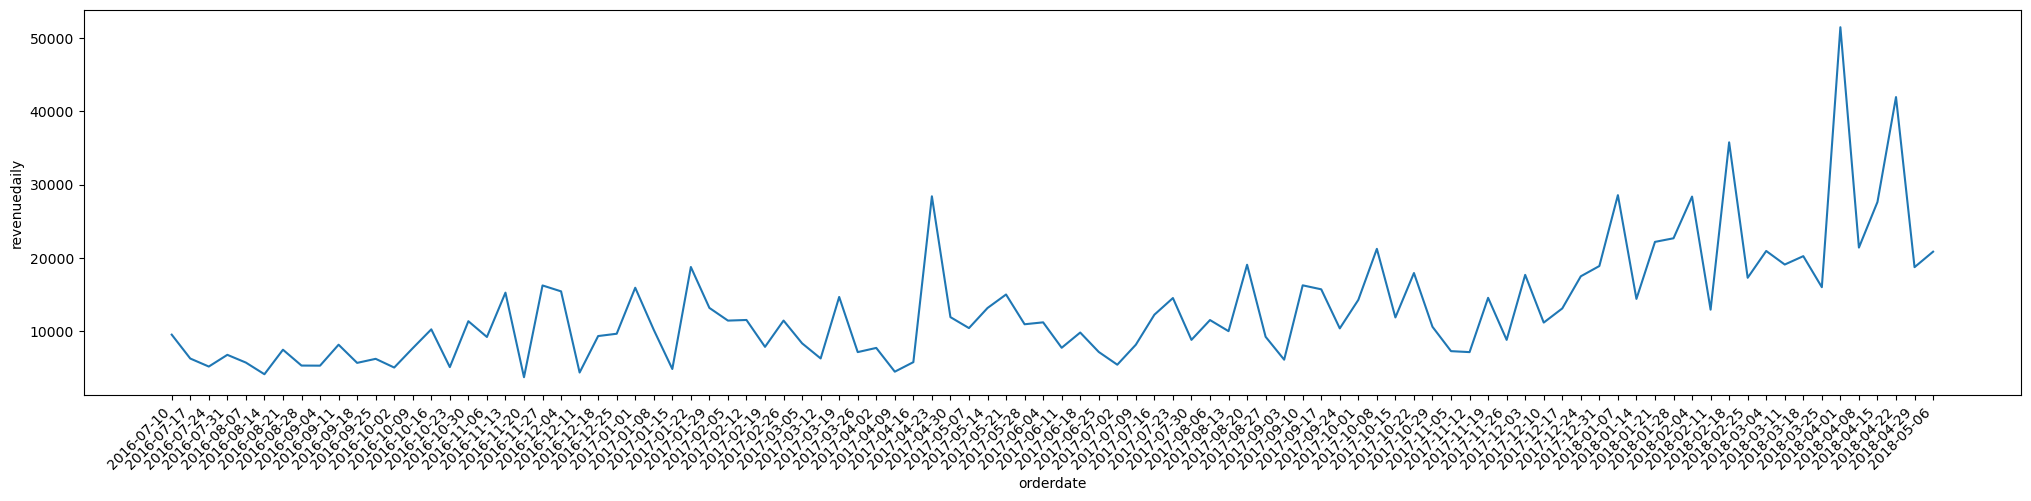

In [46]:
# Use matplotlib and seaborn to construct a dashboard from the data obtained, 
# describing the orders
# 2.1 Create line graphs describing the revenue history (revenuedaily) and the number of of orders (ordersdaily) (total for the week)
plt.figure(figsize=(25,5))
ax1 = sns.lineplot(x="orderdate", y="revenuedaily", data=df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index());
xticks = df.set_index('orderdate').resample('W').sum().index
ax1.set_xticks(xticks);
ax1.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45, ha='right');

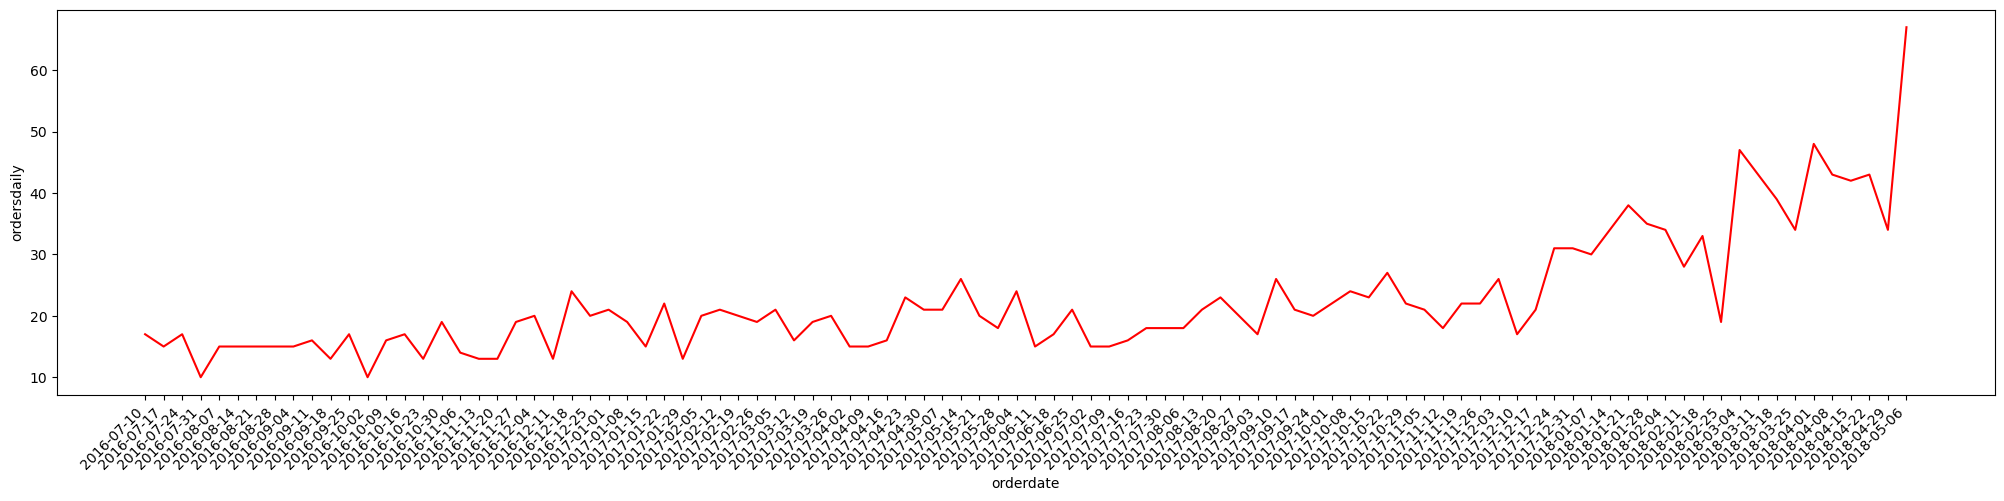

In [45]:
plt.figure(figsize=(25,5))
ax2 = sns.lineplot(x="orderdate", y="ordersdaily", data=df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index(), color='red');
xticks = df.set_index('orderdate').resample('W').sum().index
ax2.set_xticks(xticks);
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45, ha='right');

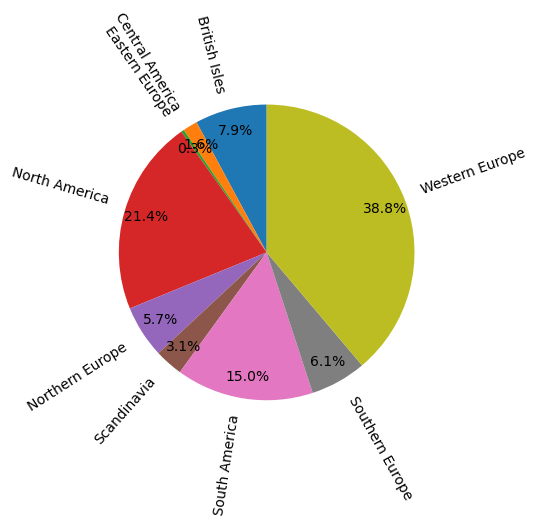

In [42]:
# 2.2 Create a pie chart showing shipregion's share in revenue for the whole period
# make shure that labels not overlap each other
# set label rotation angle to 45 degrees
ax3 = plt.pie(df.groupby('shipregion').sum().revenuedaily, 
              labels=df.groupby('shipregion').sum().revenuedaily.index, 
              autopct='%1.1f%%', startangle=90, rotatelabels=True, pctdistance=0.85);

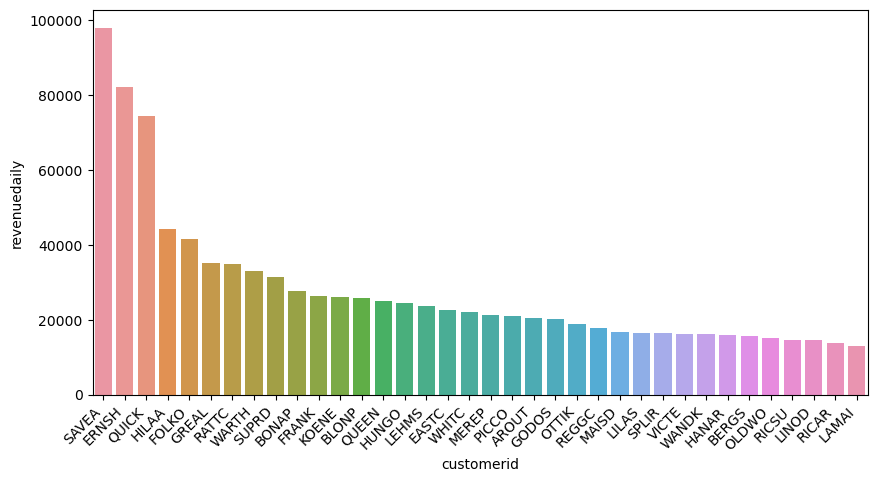

In [49]:
# 2.3 Create a bar chart showing the revenue of class A clients. 
# According to ABC analysis this is the list of clients that bring 80% of 
# the total revenue for the period.
df_clients = df.groupby('customerid').sum().sort_values('revenuedaily', ascending=False)
df_clients['cumsum'] = df_clients.revenuedaily.cumsum()
df_clients['cumsum_perc'] = df_clients['cumsum'] / df_clients.revenuedaily.sum()
df_clients = df_clients[df_clients.cumsum_perc <= 0.8]
plt.figure(figsize=(10,5))
ax4 = sns.barplot(x="customerid", y="revenuedaily", data=df_clients.reset_index());
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right');

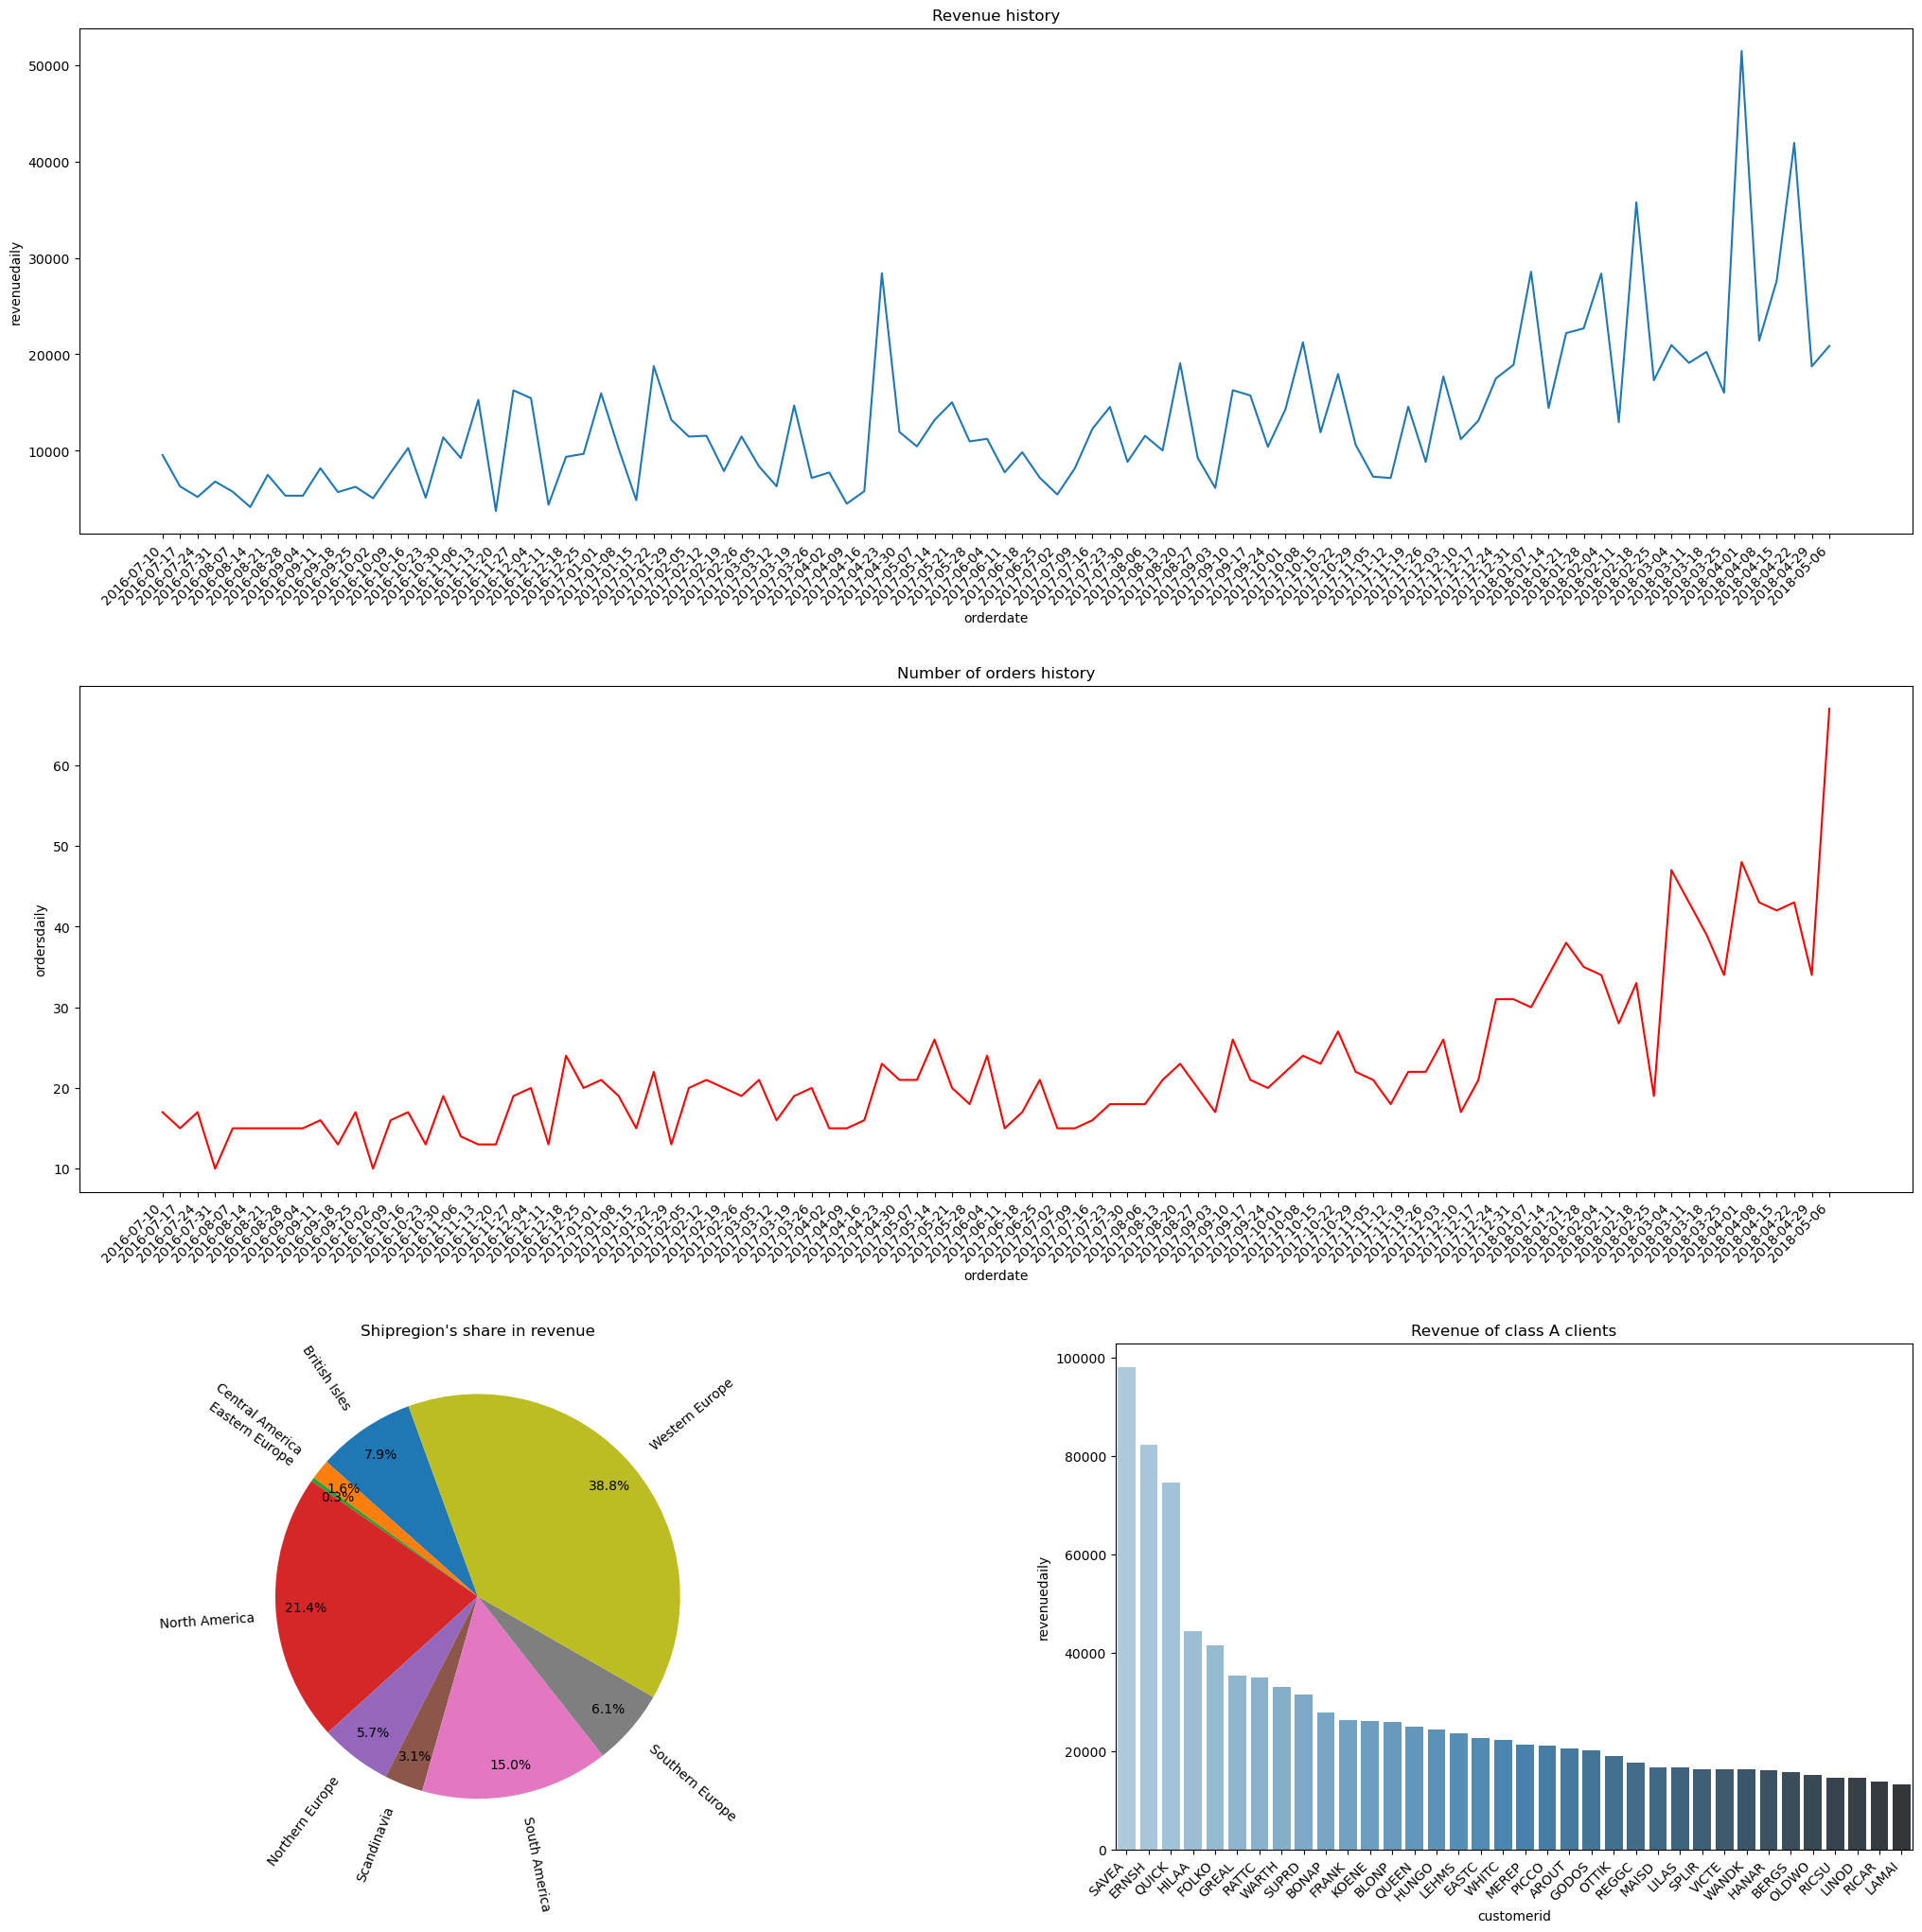

In [74]:
# 2.4 Create a grid of 4 nested graphs and feed each of them with diagrams from 2.1 - 2.3

fig = plt.figure(figsize=(25, 25))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
gs = gridspec.GridSpec(3, 2)
ax1 = fig.add_subplot(gs[0,:])
sns.lineplot(x="orderdate", y="revenuedaily", data=df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index(), ax=ax1);
xticks = df.set_index('orderdate').resample('W').sum().index
ax1.set_xticks(xticks);
ax1.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45, ha='right');
ax1.set_title('Revenue history')
ax2 = fig.add_subplot(gs[1,:])
sns.lineplot(x="orderdate", y="ordersdaily", data=df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index(), color='red', ax=ax2);
ax2.set_xticks(xticks);
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45, ha='right');
ax2.set_title('Number of orders history')
ax3 = fig.add_subplot(gs[2,0])
ax3.pie(df.groupby('shipregion').sum().revenuedaily, 
        labels=df.groupby('shipregion').sum().revenuedaily.index, 
        autopct='%1.1f%%', startangle=110, rotatelabels=True, pctdistance=0.85);
ax3.set_title('Shipregion\'s share in revenue')
ax4 = fig.add_subplot(gs[2,1])
sns.barplot(x="customerid", y="revenuedaily", data=df_clients.reset_index(), ax=ax4, palette='Blues_d');
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right');
ax4.set_title('Revenue of class A clients');

3. Change the line type on graphs 2.1 to a dashed line.
4. Add a colour fill below the sales chart and change the colours (revenue in blue and sales in red).
5. Add background fill for graph 2.1 describing revenue history
6. Add a header for the whole grid, and for each graph individually
7. In the pie chart, highlight the wedge that describes the region with the highest
the biggest share (move it out against other wedges)
8. Replace the base palette in the bar chart with a self-mixed palette of
green and yellow
9. Change the size of the entire chart grid by half (increase both in width and height).
10. Add a grid with grey lines to graphs 2.1 and 2.3

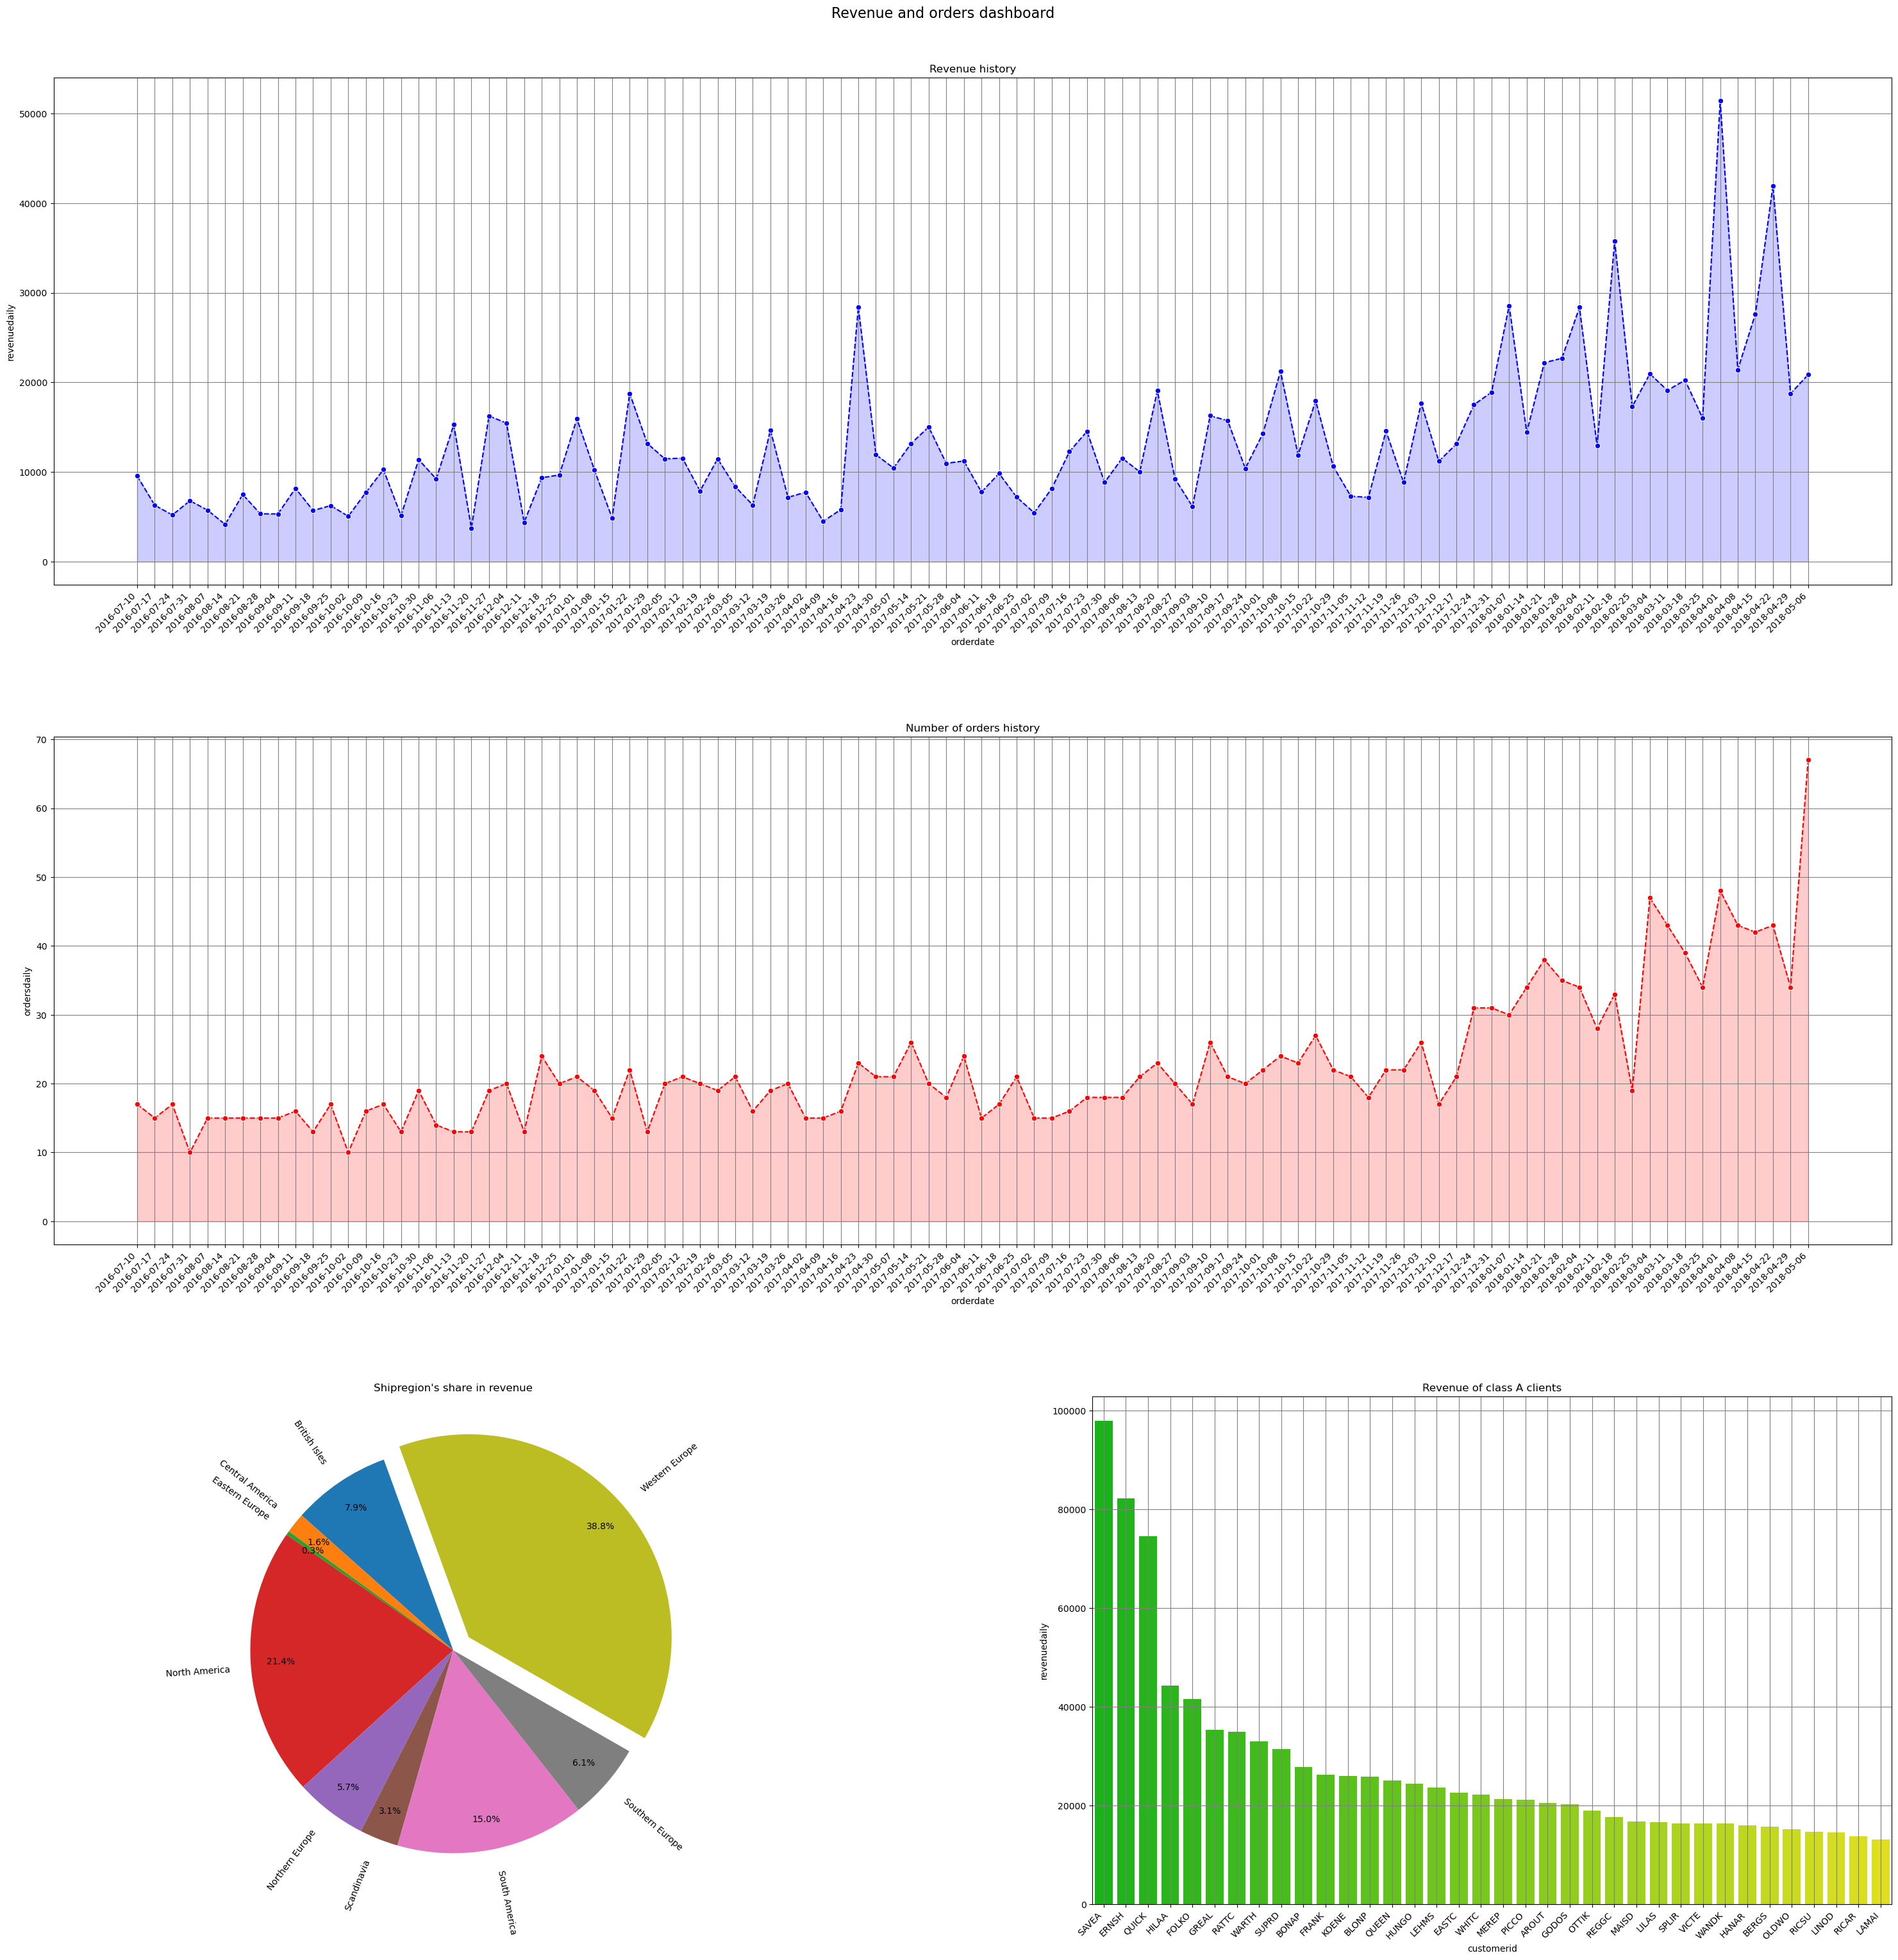

In [147]:
def create_gradient_palette(start_color : tuple, end_color : tuple, num_colors : int):
    # Create the intermediate colors using linear interpolation
    r = [start_color[0] + (float(i) / (num_colors - 1)) * (end_color[0] - start_color[0]) for i in range(num_colors)]
    g = [start_color[1] + (float(i) / (num_colors - 1)) * (end_color[1] - start_color[1]) for i in range(num_colors)]
    b = [start_color[2] + (float(i) / (num_colors - 1)) * (end_color[2] - start_color[2]) for i in range(num_colors)]
    colors = [(r[i], g[i], b[i]) for i in range(num_colors)]

    # Convert the colors to a Seaborn palette
    palette = sns.color_palette(colors)
    
    return palette

green_color = (0.0, 0.8, 0.0)
yellow_color = (1.0, 1.0, 0.0)


upscale = 1.5
fig = plt.figure(figsize=(int(25 * upscale), int(25 * upscale)))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
gs = gridspec.GridSpec(3, 2)


ax1 = fig.add_subplot(gs[0,:])
sns.lineplot(x="orderdate", y="revenuedaily", data=df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index(), 
             color='blue', ax=ax1, linestyle='--', marker='o');
xticks = df.set_index('orderdate').resample('W').sum().index
ax1.set_xticks(xticks);
ax1.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45, ha='right');
ax1.set_title('Revenue history')

ax1.fill_between(xticks, df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().revenuedaily,
                 alpha=0.2, color='blue')
ax1.grid(color='gray')

ax2 = fig.add_subplot(gs[1,:])
sns.lineplot(x="orderdate", y="ordersdaily", data=df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index(), 
             color='red', ax=ax2, linestyle='--', marker='o');
ax2.set_xticks(xticks);
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45, ha='right');
ax2.set_title('Number of orders history')

ax2.fill_between(xticks, df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().ordersdaily,
                 alpha=0.2, color='red')
ax2.grid(color='gray')

ax3 = fig.add_subplot(gs[2,0])
ax3.pie(df.groupby('shipregion').sum().revenuedaily, 
        labels=df.groupby('shipregion').sum().revenuedaily.index, 
        autopct='%1.1f%%', startangle=110, rotatelabels=True, pctdistance=0.85,
        explode=[0.1 if x == df.groupby('shipregion').sum().revenuedaily.idxmax() else 0 for x in df.groupby('shipregion').sum().revenuedaily.index]);
ax3.set_title('Shipregion\'s share in revenue')


my_palette = create_gradient_palette(green_color, yellow_color, len(df_clients))
ax4 = fig.add_subplot(gs[2,1])
sns.barplot(x="customerid", y="revenuedaily", data=df_clients.reset_index(), ax=ax4, palette=my_palette);
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right');
ax4.set_title('Revenue of class A clients');

ax4.grid(color='gray')

fig.suptitle('Revenue and orders dashboard', fontsize=16, y=0.91);